In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt #plotting
import librosa.display #audio data show
% pylab inline 
import os
import pandas as pd
import librosa
import glob 
import numpy as np
import random

Populating the interactive namespace from numpy and matplotlib


**Load Data**

In [ ]:
import librosa
audio_file_path='/content/drive/MyDrive/DataMining/Datasets/Minimal/rec01.mp3'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path) #analog to digital-sampling rate , sampling r por data list e pabo
print(librosa_audio_data)
print("Audio data :", len(librosa_audio_data)) #array length
print("Sample Rate :", librosa_sample_rate)   #value

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[ 6.1650295e-04  1.1957149e-03  9.4666175e-04 ... -7.4860523e-08
  5.7690094e-08  0.0000000e+00]
Audio data : 23307
Sample Rate : 22050


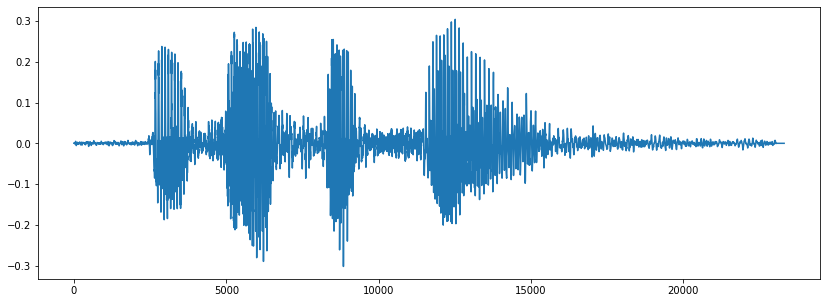

In [ ]:
# Original audio with 1 channel 
plt.figure(figsize=(14, 5))
plt.plot(librosa_audio_data)

**Extract Features**

*   Mel-Frequency Cepstral Coefficients(MFCC)
*   Zero Crossing Rate
*   Harmonics and Perceptrual
*   Tempo BMP (beats per minute)
*   Spectral Centroid
*   Spectral Rolloff
*   Chroma Frequencies










In [ ]:
mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40) #40 - koto boro length r feature array chai
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) #mean-normalization

extracted_features=[]
extracted_features.append([mfccs_scaled_features])
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature'])
extracted_features_df.head()

,feature
0,"[-345.9266, 145.2937, 18.525759, 8.906574, -14..."


In [ ]:
import os
from os import listdir
from os.path import join, isfile
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np

datasetdir = '/content/drive/MyDrive/DataMining/SoundDataset'
os.chdir(datasetdir) #chng directory- directory chng hoye sound dataset ase
curr_path = os.path.join(datasetdir, 'fear')
files = [f for f in listdir(curr_path) if isfile(join(curr_path, f))]
print(files)

['1004_IEO_FEA_LO.wav', '1002_TIE_FEA_XX.wav', '1001_TIE_FEA_XX.wav', '1007_TSI_FEA_XX.wav', '1009_WSI_FEA_XX.wav', '1009_DFA_FEA_XX.wav', '1006_IEO_FEA_HI.wav', '1001_IEO_FEA_MD.wav', '1005_IOM_FEA_XX.wav', '1006_IOM_FEA_XX.wav', '1008_ITS_FEA_XX.wav', '1003_DFA_FEA_XX.wav', '1005_WSI_FEA_XX.wav', '1009_IEO_FEA_HI.wav', '1008_IOM_FEA_XX.wav', '1009_IEO_FEA_MD.wav', '1006_DFA_FEA_XX.wav', '1002_ITH_FEA_XX.wav', '1005_TSI_FEA_XX.wav', '1001_WSI_FEA_XX.wav', '1007_IOM_FEA_XX.wav', '1007_WSI_FEA_XX.wav', '1009_TAI_FEA_XX.wav', '1010_IEO_FEA_HI.wav', '1005_IWL_FEA_XX.wav', '1008_DFA_FEA_XX.wav', '1010_IEO_FEA_LO.wav', '1003_IEO_FEA_MD.wav', '1008_IEO_FEA_MD.wav', '1003_IWL_FEA_XX.wav', '1004_IOM_FEA_XX.wav', '1009_ITH_FEA_XX.wav', '1005_MTI_FEA_XX.wav', '1004_TSI_FEA_XX.wav', '1004_TIE_FEA_XX.wav', '1002_TSI_FEA_XX.wav', '1006_TSI_FEA_XX.wav', '1009_IWL_FEA_XX.wav', '1009_IEO_FEA_LO.wav', '1008_IWL_FEA_XX.wav', '1023_ITS_FEA_XX.wav', '1018_TSI_FEA_XX.wav', '1016_ITS_FEA_XX.wav', '1022_IWL_

In [ ]:
classes = ['Minimal', 'Mild', 'Moderate', 'Extreme']
#classes = ['angry', 'disgusting', 'fear', 'happy', 'neutral', 'sad']
extracted_features=[]
for i in range(len(classes)):
  curr_path = os.path.join(datasetdir, classes[i])
  files = [f for f in listdir(curr_path) if isfile(join(curr_path, f))]
  for j in range(0,len(files)):
    librosa_audio_data, librosa_sample_rate = librosa.load(curr_path+"/"+files[j])
    # print(len(librosa_audio_data))
    # print(librosa_sample_rate)
    mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    extracted_features.append([mfccs_scaled_features,classes[i]]) #2d array-serial wise

random.shuffle(extracted_features) 

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['mfcc','class'])
extracted_features_df.head(40)


,mfcc,class
0,"[-389.11612, 134.78291, 20.835638, 42.57699, -...",happy
1,"[-362.71378, 131.13004, 9.504832, 49.71305, -2...",fear
2,"[-344.12408, 127.563835, -9.674393, 56.702656,...",angry
3,"[-397.93814, 136.31464, 0.10341388, 46.147217,...",fear
4,"[-387.35507, 136.15062, 20.094812, 40.813313, ...",happy
5,"[-390.3774, 140.5221, 4.94012, 60.18863, -8.70...",happy
6,"[-386.957, 143.71889, 5.2979865, 52.258373, 0....",disgusting
7,"[-413.74573, 152.06593, -4.3294454, 55.44029, ...",neutral
8,"[-378.3279, 134.05115, -1.5590818, 54.774044, ...",angry
9,"[-382.637, 139.17424, -2.6162682, 56.612366, -...",disgusting


In [ ]:
### Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['mfcc'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(6522, 40)

In [ ]:
#y=np.array(pd.get_dummies(y))
y=np.array(y)


In [ ]:
y.shape

(6522,)

In [ ]:
y

array(['happy', 'fear', 'angry', ..., 'happy', 'angry', 'happy'],
      dtype='<U10')

***SVM***

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[-3.13633148e+02  1.19952637e+02  1.30798903e+01 ...  2.33235383e+00
   1.60461617e+00  3.05624151e+00]
 [-3.44936768e+02  1.37195892e+02  4.64282703e+00 ...  6.85432494e-01
  -1.91896498e+00  1.05687785e+00]
 [-4.17019287e+02  1.56050140e+02 -1.13240185e+01 ...  3.45806885e+00
   5.97227693e-01  3.61188889e+00]
 ...
 [-3.87176056e+02  1.42703308e+02  8.59114075e+00 ...  7.27832735e-01
  -1.72043788e+00  8.94323230e-01]
 [-4.38802582e+02  1.37804367e+02  8.05508423e+00 ...  3.56356192e+00
   3.00238311e-01  4.12899923e+00]
 [-4.12178619e+02  1.31011551e+02  2.41251850e+01 ...  1.94594347e+00
   6.11160040e-01  2.73033047e+00]]
['angry' 'angry' 'neutral' ... 'neutral' 'neutral' 'happy']
[[-3.1370593e+02  1.1941521e+02  8.1568365e+00 ...  1.4386817e+00
  -2.6997322e-01 -4.3505937e-01]
 [-3.3366992e+02  1.4608118e+02  1.1685414e+01 ...  9.4826299e-01
  -9.7507191e-01  5.6425571e-01]
 [-4.4031100e+02  1.6143196e+02  8.5870953e+00 ... -1.8856449e-01
  -1.6883608e+00  2.0369413e+00]
 ...
 [

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



[[ 1.32491088e+00 -9.88857865e-01  7.36808300e-01 ...  4.35511768e-01
   1.28829837e+00  8.14303219e-01]
 [ 7.61520982e-01  1.08099155e-01  4.34166053e-03 ... -4.08494204e-01
  -7.39357531e-01 -4.12345886e-01]
 [-5.35791159e-01  1.30754209e+00 -1.38182557e+00 ...  1.01241255e+00
   7.08593547e-01  1.15520382e+00]
 ...
 [ 1.31530128e-03  4.58462119e-01  3.47115874e-01 ... -3.86765152e-01
  -6.25114441e-01 -5.12076318e-01]
 [-9.27838087e-01  1.46808237e-01  3.00577939e-01 ...  1.06647515e+00
   5.37690043e-01  1.47246110e+00]
 [-4.48670745e-01 -2.85327524e-01  1.69570935e+00 ...  2.37486124e-01
   7.16610968e-01  6.14350319e-01]]
[[ 1.323601   -1.0230472   0.30941162 ... -0.02247283  0.20956004
  -1.3276788 ]
 [ 0.9642971   0.6733506   0.6157463  ... -0.27380016 -0.19619125
  -0.7145792 ]
 [-0.9549861   1.6499151   0.34676468 ... -0.8563958  -0.6066556
   0.18894237]
 ...
 [ 1.4389821  -0.22040436 -2.3631425  ...  0.7798808   0.51399595
  -1.106783  ]
 [ 0.180513    0.3309591  -1.4646493

0.4655436447166922